In [36]:
# Library imports / set up
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# display is required to allow multiple prints in each cell
from IPython.display import display
import numpy as np
pd.set_option('display.max_colwidth', -1)

In [37]:
# Data is read
dc = pd.read_csv('david_cameron_tweets.csv', sep="|")
tm = pd.read_csv('theresa_may_tweets.csv', sep="|")

# Print out first line to make sure data is read ok
display(dc.head(1))
display(tm.head(1))


# Print rows x columns so we're sure it's ok
display("DC " + str(dc.shape) + ", TM " + str(tm.shape) )

,id,created_at,text
0,1019946110142513152,2018-07-19 14:04:36,Brilliant to see this further investment in Alzheimer’s research. Thank you @BillGates! https://t.co/SRd31NykFx


,id,created_at,text
0,1020286313562628098,2018-07-20 12:36:27,Torbay's @thlof do excellent charitable work raising money to help support @TorbaySDevonNHS. Their dedicated volunteers make a huge difference to the local community and patients - and @kevin_j_foster is a passionate supporter of their work. https://t.co/aqvRqNA5QX


'DC (2680, 3), TM (955, 3)'

In [38]:
# created_at is likely to be parsed as text
# We convert dates to a date/time format so we can do 'maths' on them
dc['created_at'] = pd.to_datetime(dc['created_at'], format='%Y-%m-%d %H:%M:%S')
tm['created_at'] = pd.to_datetime(tm['created_at'], format='%Y-%m-%d %H:%M:%S')

# If ok, dtype should be datetime64[ns] or <M8[ns]
dc.created_at.dtype #tm.created_at.dtype

dtype('<M8[ns]')

In [39]:
# DC Min and Max
print("Min " + str(dc['created_at'].min()) + " Max " + str(dc['created_at'].max()))
# Election periods: scottish referendum (pre premiership), pre 2015, and pre 2016 referendum

Min 2012-10-06 16:51:46 Max 2018-07-19 14:04:36


In [40]:
# TM Min and Max
print("Min " + str(tm['created_at'].min()) + " Max " + str(tm['created_at'].max()))

Min 2016-06-30 08:05:36 Max 2018-07-20 12:36:27


# Statistics

In [41]:
# Add year/week
dc['YearWeek'] = dc['created_at'].apply(lambda x: "%d/%d" % (x.year, x.week))
tm['YearWeek'] = tm['created_at'].apply(lambda x: "%d/%d" % (x.year, x.week))

In [42]:
dc.head(2)

,id,created_at,text,YearWeek
0,1019946110142513152,2018-07-19 14:04:36,Brilliant to see this further investment in Alzheimer’s research. Thank you @BillGates! https://t.co/SRd31NykFx,2018/29
1,1017391120945483776,2018-07-12 12:52:00,Delighted that @wigdortz will be the new Chair of @NCSTrust. Have no doubt that he will have every success in taking @NCS on to the next stage in its history.,2018/28


In [43]:
dc_week = dc.groupby(['YearWeek'])
x = dc_week.aggregate(np.count_nonzero)
x = x.reset_index(level=['YearWeek'])
x.head(5)
#dc_week = x[['YearWeek', 'id']].copy()
#dc_week.columns = ['YearWeek', 'Count']

,YearWeek,id,created_at,text
0,2012/40,4,4,4
1,2012/41,8,8,8
2,2012/42,4,4,4
3,2012/43,6,6,6
4,2012/44,2,2,2


In [44]:
# Aggregate tweet counts per week
dc_week = dc.groupby(['YearWeek'])
x = dc_week.aggregate(np.count_nonzero)
x = x.reset_index(level=['YearWeek'])
dc_week = x[['YearWeek', 'id']].copy()
dc_week.columns = ['YearWeek', 'Count']

tm_week = tm.groupby(['YearWeek'])
x = tm_week.aggregate(np.count_nonzero)
x = x.reset_index(level=['YearWeek'])
tm_week = x[['YearWeek', 'id']].copy()
tm_week.columns = ['YearWeek', 'Count']

# Make sure it worked
display(dc_week.head(3))
display(tm_week.head(3))

,YearWeek,Count
0,2012/40,4
1,2012/41,8
2,2012/42,4


,YearWeek,Count
0,2016/26,44
1,2016/27,94
2,2016/28,16


In [45]:
# Let's put the values for DC, TM, together in a single data frame, for simplicity
df = pd.DataFrame(columns=["YearWeek","DC", "TM"])

i = 0
for year in range (2012, 2018):
    for week in range (1, 52):
        mydate = str(year) + "/" + str(week)
        
        DC = 0
        try:
            DC = dc_week.loc[dc_week['YearWeek'] == mydate].iloc[0]['Count']
        except:
            DC = 0
            
        TM = 0
        try:
            TM = tm_week.loc[tm_week['YearWeek'] == mydate].iloc[0]['Count']
        except:
            TM = 0
            
       
        df.loc[i] = [ mydate, int(DC), int(TM) ]
        i = i + 1
        
df.head()

,YearWeek,DC,TM
0,2012/1,0,0
1,2012/2,0,0
2,2012/3,0,0
3,2012/4,0,0
4,2012/5,0,0


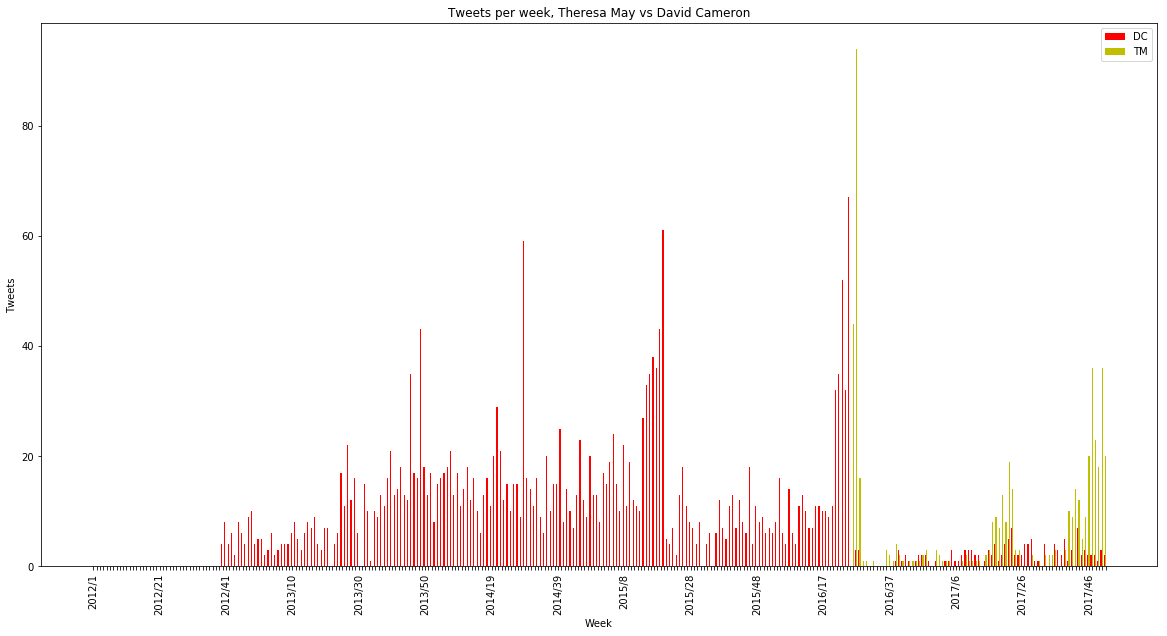

In [46]:
# Plot (DC vs TM)
setDC = df['DC']
setTM = df['TM']

fig, ax = plt.subplots(figsize=(20, 10))  
index = np.arange(len(df)) # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(index, setDC, width, color='r')
p2 = ax.bar(index + width, setTM, width, color='y')

ax.set_title('Tweets per week, Theresa May vs David Cameron')

# set axis ticks, and make visible only 1 every 20
ax.set_xticks(index + width )
ax.set_xticklabels(df['YearWeek'])
plt.xticks(fontsize=10, rotation='vertical')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)

# Print legend and labels
ax.legend((p1[0], p2[0]), ('DC', 'TM'))
ax.set_ylabel('Tweets')
ax.set_xlabel('Week')

ax.autoscale_view()

plt.show()

### RQ1. Electoral periods vs non-electoral periods

# Content analysis of tweets

In [13]:
# Just to have the sample dataframe here for comparison
dc.head(5)

,id,created_at,text,YearWeek
0,1019946110142513152,2018-07-19 14:04:36,Brilliant to see this further investment in Alzheimer’s research. Thank you @BillGates! https://t.co/SRd31NykFx,2018/29
1,1017391120945483776,2018-07-12 12:52:00,Delighted that @wigdortz will be the new Chair of @NCSTrust. Have no doubt that he will have every success in taking @NCS on to the next stage in its history.,2018/28
2,1017148899474202624,2018-07-11 20:49:30,"Well done @England on the fantastic achievement of reaching the #WorldCup semi-finals. It wasn’t to be this time, but you played like lions and made us all so proud. 🦁🦁🦁#ThreeLions",2018/28
3,1016644620573396992,2018-07-10 11:25:40,Peter Carrington was a lovely man and a great public servant. It was a huge honour having him to Chequers and listening to his stories of working with every Conservative leader from Winston Churchill onwards. Kindness and brilliance in equal measure; he'll be deeply missed. https://t.co/nPxTobnP8Z,2018/28
4,1015628849009364992,2018-07-07 16:09:21,What an incredible result - well done @England; huge congratulations! Bring on the Semis for #ThreeLions... We’re all proud and cheering you on!,2018/27


In [48]:
# Here we define energy and friendliness words
words_energy = ['believe', 'belief', 'action', 'do', 
                'take', 'fast', 'quick', 'as soon as possible', 'law', 'legislate', 
                'respond', 'right', 'wrong']

words_friendliness = ['sympathy', 'concern', 'condolences', 'support', 'understand', 
                      'help', 'assist', 'disaster', 'tragedy']

In [49]:
# Word search -> calculate the two indices per week
import re
import string

def indices(df, textColumn, weekColumn):
        
    output  = []
    
    # navigate one row at a time
    for index, row in df.iterrows():

        
        # week will be used to index
        week = row[weekColumn]
        
        weekTotalWords = 0
        weekEnergyCount = 0
        weekFriendlinessCount = 0        
    
        # process text to make it searchable (add spaces, replace punctuation)
        text = " " + row[textColumn].lower() + " "
        translator = str.maketrans('','',string.punctuation)
        text = text.translate(translator)
        weekTotalWords = sum([1 for i in text.split()])

            
        # search words in string
        for search_word in words_energy:
            my_regex = r" " + re.escape(search_word) + r" "
            occurrences = len(re.findall(my_regex, text))
            weekEnergyCount= weekEnergyCount + occurrences

        
        for search_word in words_friendliness:
            my_regex = r" " + re.escape(search_word) + r" "
            occurrences = len(re.findall(my_regex, text))
            weekFriendlinessCount = weekFriendlinessCount + occurrences
        
        # Set output
        out = dict()
        out['YearWeek'] = week
        out['weekEnergy'] = weekEnergyCount*100/weekTotalWords
        out['weekFriendliness'] = weekFriendlinessCount*100/weekTotalWords
        output.append(out)
    
    return pd.DataFrame(output)

In [55]:
# Aggregate by week
#dcaggr = dc.groupby(['YearWeek'])['text'].apply(lambda x: ' '.join(x)).reset_index(['YearWeek', 'text'])
dcaggr = dc.groupby(['YearWeek'])['text'].apply(lambda x: ' '.join(x)).reset_index(['YearWeek'])
tmaggr = tm.groupby(['YearWeek'])['text'].apply(lambda x: ' '.join(x)).reset_index(['YearWeek'])

# if you need to compare to compare:
# dfme['2012/40'] vs dc[dc['YearWeek']=='2012/40']
dcaggr.head(2)

,YearWeek,text
0,2012/40,"An excellent speech from @WilliamJHague. Britain will take tough action against illegal arms trade and sexual violence. http://t.co/2Gx7i9H9 About to appear on @MarrShow: I'll be explaining how we're on the side of people who want to get on in life. http://t.co/kDF1xD4f Today I met the nursing team at the John Radcliffe Hospital, and announced £140m to help their work across the country http://t.co/Ztw8c99N I'm starting Conference with this new Twitter feed about my role as Conservative Leader. I promise there won't be ""too many tweets..."""
1,2012/41,"Just leaving what has been a great #cpc12. A big thank you to all involved, we really showed that 'Britain can deliver' http://t.co/Cam3fO3c I’m levelling with the British people in my speech at 11.30. It's sink or swim, do or decline. How we'll ensure Britain wins the Global Race Thanks to my team for squeezing in a quick birthday celebration on this v hectic day. http://t.co/6cPtA2di I'm told some bookmakers are regretting laying odds against this account passing 100,000 followers during conference. I’ll be explaining how we win in the Global Race at 7.25 @Daybreak, 7.40 @BBCBreakfast, 8.10 @BBCr4today, 8.20 @SkyNews Had a really constructive session with Police and Crime Commissioner candidates earlier – ahead of elections on 15 Nov. Just packed some boxes for #supportoursoldiers. Conference has packed 261 so far - let's aim for 1500 by Wednesday http://t.co/qCIQH0m0 Looking forward to hearing George tell #cpc12 why we’re on the right course with our plans on welfare, deficit reduction and growth."


In [56]:
# David Cameron indices
dci = indices(dcaggr, 'text', 'YearWeek')
dci.head()

,YearWeek,weekEnergy,weekFriendliness
0,2012/40,2.352941,1.176471
1,2012/41,1.863354,0.000000
2,2012/42,1.333333,0.000000
3,2012/43,1.666667,0.000000
4,2012/44,0.000000,0.000000


In [57]:
# Theresa May indices
tmi = indices(tmaggr, 'text', 'YearWeek')
tmi.head()

,YearWeek,weekEnergy,weekFriendliness
0,2016/26,0.619579,0.619579
1,2016/27,0.427122,0.480513
2,2016/28,0.324675,0.000000
3,2016/29,0.000000,0.000000
4,2016/30,0.000000,0.000000


<Figure size 432x288 with 0 Axes>

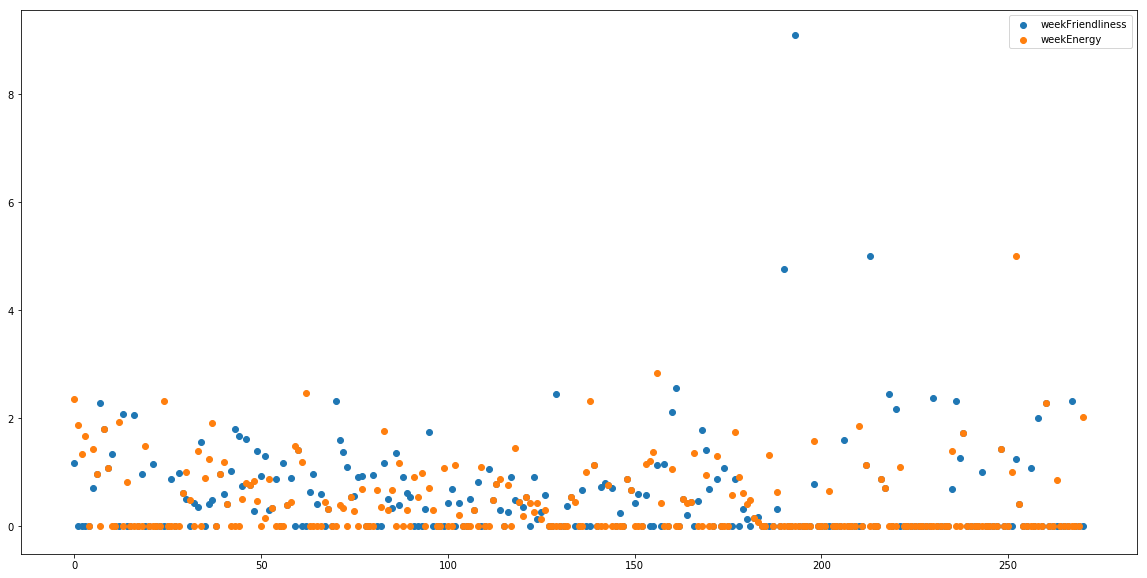

In [58]:
# Plot David Cameron
plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(dci.index, dci['weekFriendliness'])
ax.scatter(dci.index, dci['weekEnergy'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<Figure size 432x288 with 0 Axes>

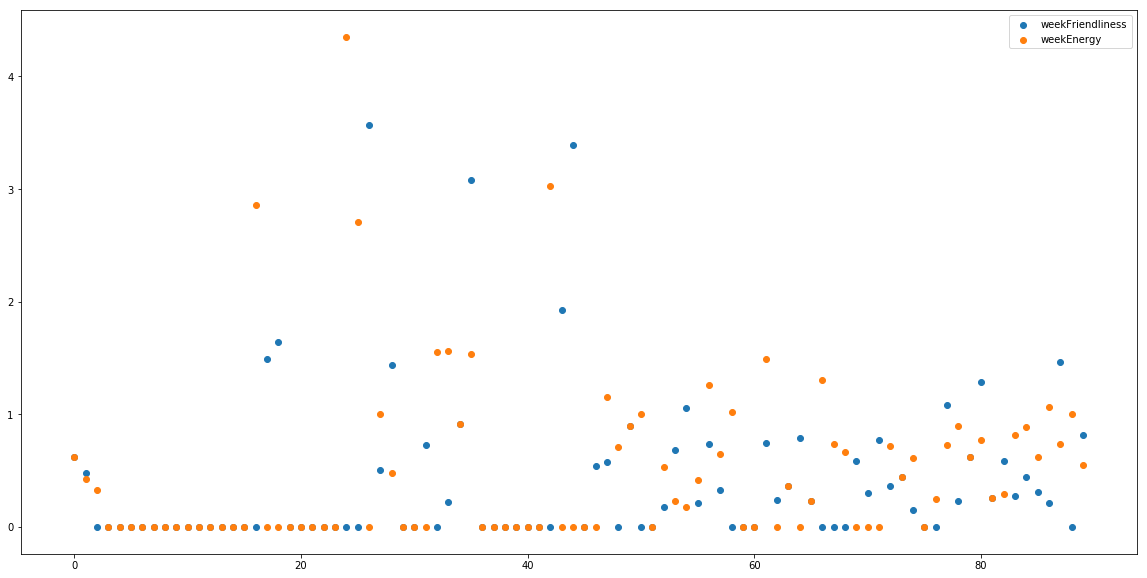

In [59]:
# Plot Theresa May
plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(tmi.index, tmi['weekFriendliness'])
ax.scatter(tmi.index, tmi['weekEnergy'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [60]:
tmi['weekEnergy'].max()

4.3478260869565215

In [61]:
tmi['weekFriendliness'].max()

3.5714285714285716

In [62]:
dci['weekEnergy'].max()

5.0

In [63]:
dci['weekFriendliness'].max()

9.090909090909092

# Word counts

In [64]:
dc.head()

,id,created_at,text,YearWeek
0,1019946110142513152,2018-07-19 14:04:36,Brilliant to see this further investment in Alzheimer’s research. Thank you @BillGates! https://t.co/SRd31NykFx,2018/29
1,1017391120945483776,2018-07-12 12:52:00,Delighted that @wigdortz will be the new Chair of @NCSTrust. Have no doubt that he will have every success in taking @NCS on to the next stage in its history.,2018/28
2,1017148899474202624,2018-07-11 20:49:30,"Well done @England on the fantastic achievement of reaching the #WorldCup semi-finals. It wasn’t to be this time, but you played like lions and made us all so proud. 🦁🦁🦁#ThreeLions",2018/28
3,1016644620573396992,2018-07-10 11:25:40,Peter Carrington was a lovely man and a great public servant. It was a huge honour having him to Chequers and listening to his stories of working with every Conservative leader from Winston Churchill onwards. Kindness and brilliance in equal measure; he'll be deeply missed. https://t.co/nPxTobnP8Z,2018/28
4,1015628849009364992,2018-07-07 16:09:21,What an incredible result - well done @England; huge congratulations! Bring on the Semis for #ThreeLions... We’re all proud and cheering you on!,2018/27


In [65]:
# Create sets of unique words
from collections import Counter

dc['text'] = dc['text'].map(lambda x: x.lower())
tm['text'] = tm['text'].map(lambda x: x.lower())

# Cameron
dc_counter = Counter(" ".join(dc['text']).split(" "))
dc_counter_frame = pd.DataFrame.from_dict(dc_counter, orient='index')
dc_counter_frame.columns = ['count']
dc_counter_frame = dc_counter_frame.sort_values(by=['count'], ascending=False)

# May
tm_counter = Counter(" ".join(tm['text']).split(" "))
tm_counter_frame = pd.DataFrame.from_dict(tm_counter, orient='index')
tm_counter_frame.columns = ['count']
tm_counter_frame = tm_counter_frame.sort_values(by=['count'], ascending=False)


In [66]:
# This function returns the log odds ration for two dataframe, providing the two counter 
import numpy as np
import math
def word_log_odds_ratio(word, df1, df2, df1counter, df2counter):
    # With Laplace smoothing: add 1 instead of returning Nan
    
    df1len = len(" ".join(df1['text']).split(" "))
    df2len = len(" ".join(df2['text']).split(" "))
  
    countdf1 = df1counter[df1counter.index == word]['count']
    countdf2 = df2counter[df2counter.index == word]['count']

    # Laplace smoothing
    if len(countdf1) == 0:
        countdf1 = 1
    else:
        countdf1 = countdf1[0]
    if len(countdf2) ==0:
        countdf2 = 1
    else:
        countdf2 = countdf2[0]
   
    p1 = countdf1 * 100 / df1len
    p2 = countdf2 * 100 / df2len
    logsodd = np.log(p1/p2)

    return logsodd
    
word_log_odds_ratio('me', dc, tm , dc_counter_frame, tm_counter_frame)

-0.5462429569041

In [67]:
# To generate a log odds dataframe we need two things
# 1. generate a unique set of words (merging the two data frames of DC and TM)
# 2. get the log odds for each word
# In reality, here it's quicker to just create the df, then drop duplicates


logodds = pd.DataFrame(columns=['count'])

# Round 1: David Cameron
for index, row in dc_counter_frame[dc_counter_frame['count']>5].iterrows():
    word = index       
    logs = word_log_odds_ratio(word, dc, tm, dc_counter_frame, tm_counter_frame)
    logodds.loc[word] = pd.Series({'count':logs})
        
# Round 2: Theresa May
for index, row in tm_counter_frame[tm_counter_frame['count']>5].iterrows():
    word = index       
    logs = word_log_odds_ratio(word, dc, tm, dc_counter_frame, tm_counter_frame)
    logodds.loc[word] = pd.Series({'count':logs})
    
    


In [35]:
logodds.drop_duplicates().sort_values(by=['count']).head(10)
logodds.drop_duplicates().sort_values(by=['count']).tail()

NameError: name 'logodds' is not defined

In [69]:
logodds.drop_duplicates().sort_values(by=['count']).to_csv('logsodd.csv')

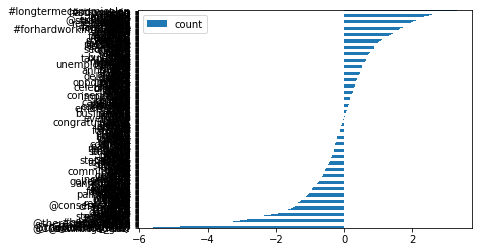

In [70]:
logodds.drop_duplicates().sort_values(by=['count']).plot(kind='barh')

In [71]:
np.log(0.025/0.28)

-2.4159137783010487

In [72]:
np.log(0.00025/0.0028)

-2.4159137783010487

In [73]:
dc_counter_frame.to_csv('dc_count.csv')
tm_counter_frame.to_csv('tm_count.csv')


In [74]:
len(" ".join(dc['text']).split(" "))

53868

In [75]:
len(" ".join(tm['text']).split(" "))

23058

# Behaviour during campaigns

## General Election 2015 vs 'normal period' for DC

In [34]:
# Definition of the period from dissolution to election (inclusive)
dc2015 = dc[(dc['created_at'] >= '2015-03-30') & (dc['created_at'] <= '2015-05-07')]
dcelse = dc[(dc['created_at'] < '2015-03-30') | (dc['created_at'] > '2015-05-07')]

if ((dc2015.shape[0] + dcelse.shape[0]) == dc.shape[0] ):
    print("Ok")

Ok


In [63]:
import datetime as dt
mydata = dc2015.copy()
# mydata['new'] = dc2015['created_at'].dt.hour
mydata['new'] = np.where((mydata['created_at'].dt.time >= '0:00') & (mydata['created_at'].dt.time < '12:00'), 'morning', 'evening')

TypeError: '>=' not supported between instances of 'datetime.time' and 'str'

In [ ]:
# Ideas
# 1. % am/pm normal vs election periods, Polargraph
# 2. log odds

# Log-odds election vs non-election